# 2.2 Clustering with 8 clusters

## Contents
### 1. Importing Libraries and Data and Creating a Subset
### 2. Standardizing the Data
### 3. k-means Clustering
### 4. Examining these profiles further by incorporating them into the main data set
### 5. Data profiles and genres by clusters
### 6. Exporting dataframes

## 1. Importing Libraries and Data and Creating a Subset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [5]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [104]:
df = pd.read_pickle(os.path.join(r'/Users/sydneyjohnson/Documents/CF Data Analytics Course/09-2024 A6 Spotify Analysis/02 Data/Prepared Data/fulldf9_27.pkl'))

In [38]:
sub = df[['popularity','duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'song_count']]

## 2. Standardizing the Data

In [40]:
sub.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song_count
0,99,251667,0.521,0.592,-7.777,0.0304,0.30800,0.000000,0.122,0.535,157.969,1860
1,100,210373,0.747,0.507,-10.171,0.0358,0.20000,0.060800,0.117,0.438,104.978,6116
2,96,157279,0.674,0.907,-4.086,0.0640,0.10100,0.000000,0.297,0.721,112.964,1140
3,94,170887,0.660,0.756,-3.743,0.0320,0.00289,0.000000,0.193,0.838,116.034,2389
4,97,175459,0.701,0.760,-5.478,0.0285,0.10700,0.000065,0.185,0.690,103.969,7504


In [42]:
sub[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 
     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'song_count']] = \
sub[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 
     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'song_count']].astype(float)


/var/folders/18/9t4s6gxn2qb60_74h5w_ymmw0000gn/T/ipykernel_4619/701415861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',


In [44]:
sub.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song_count
0,99.0,251667.0,0.521,0.592,-7.777,0.0304,0.30800,0.000000,0.122,0.535,157.969,1860.0
1,100.0,210373.0,0.747,0.507,-10.171,0.0358,0.20000,0.060800,0.117,0.438,104.978,6116.0
2,96.0,157279.0,0.674,0.907,-4.086,0.0640,0.10100,0.000000,0.297,0.721,112.964,1140.0
3,94.0,170887.0,0.660,0.756,-3.743,0.0320,0.00289,0.000000,0.193,0.838,116.034,2389.0
4,97.0,175459.0,0.701,0.760,-5.478,0.0285,0.10700,0.000065,0.185,0.690,103.969,7504.0


In [46]:
import scipy 
from scipy import stats 

# Using sub.loc to avoid the warning
sub.loc[:, ['popularity','duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'song_count']] = stats.zscore(sub[['popularity','duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'song_count']])

In [48]:
sub.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song_count
0,1.400806,1.185231,-1.203716,-0.374073,-0.523503,-0.719252,0.150202,-0.190842,-0.388029,-0.065189,1.270303,0.203871
1,1.463600,0.359750,0.444824,-0.897904,-1.451228,-0.659117,-0.283294,0.455535,-0.428339,-0.490683,-0.617261,2.348628
2,1.212426,-0.701617,-0.087669,1.567182,0.906835,-0.345076,-0.680665,-0.190842,1.022820,0.750705,-0.332796,-0.158964
3,1.086839,-0.429589,-0.189791,0.636612,1.039755,-0.701434,-1.074463,-0.190842,0.184372,1.263929,-0.223441,0.470454
4,1.275219,-0.338193,0.109281,0.661263,0.367406,-0.740411,-0.656582,-0.190146,0.119876,0.614723,-0.653202,3.048093


### I performed the elbow technique in script 1.5. I chose to work with 6 clusters that time, this time I'm going to work with 8.

## 3. k-means Clustering

In [54]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 8) 

In [56]:
# Fit the k-means object to the data.

kmeans.fit(sub)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [58]:
sub['clusters'] = kmeans.fit_predict(sub)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/18/9t4s6gxn2qb60_74h5w_ymmw0000gn/T/ipykernel_4619/3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [60]:
sub.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song_count,clusters
0,1.400806,1.185231,-1.203716,-0.374073,-0.523503,-0.719252,0.150202,-0.190842,-0.388029,-0.065189,1.270303,0.203871,2
1,1.463600,0.359750,0.444824,-0.897904,-1.451228,-0.659117,-0.283294,0.455535,-0.428339,-0.490683,-0.617261,2.348628,0
2,1.212426,-0.701617,-0.087669,1.567182,0.906835,-0.345076,-0.680665,-0.190842,1.022820,0.750705,-0.332796,-0.158964,1
3,1.086839,-0.429589,-0.189791,0.636612,1.039755,-0.701434,-1.074463,-0.190842,0.184372,1.263929,-0.223441,0.470454,1
4,1.275219,-0.338193,0.109281,0.661263,0.367406,-0.740411,-0.656582,-0.190146,0.119876,0.614723,-0.653202,3.048093,0


In [62]:
sub['clusters'].value_counts()

clusters
1    285253
0    203931
6    195997
2    155207
5    139125
7    113758
3    112565
4     17340
Name: count, dtype: int64

In [64]:
# display all columns
pd.set_option('display.max_columns', None)

In [66]:
sub.groupby('clusters').agg({'popularity':['mean', 'median'], 
                         'duration_ms':['mean', 'median'], 
                         'danceability':['mean', 'median'],
                          'energy':['mean', 'median'],
                          'loudness':['mean', 'median'], 
                         'speechiness':['mean', 'median'], 
                         'acousticness':['mean', 'median'],
                          'instrumentalness':['mean', 'median'],
                          'liveness':['mean', 'median'], 
                         'valence':['mean', 'median'], 
                         'tempo':['mean', 'median'],
                          'song_count':['mean', 'median']})

popularity           duration_ms           danceability            \
               mean    median        mean    median         mean    median   
clusters                                                                     
0          0.907533  0.961252   -0.141530 -0.241339     0.275658  0.401058   
1         -0.039973  0.144936   -0.226976 -0.295433     0.599043  0.656363   
2          0.191153  0.396110    0.318316  0.160386    -0.818133 -0.795228   
3         -0.062834  0.144936    0.025816 -0.133032    -0.195210 -0.175202   
4         -0.317404 -0.043444    0.354132 -0.242579    -0.100882  0.101986   
5          0.008814  0.207730    0.359970  0.342698    -1.216159 -1.269366   
6         -0.699240 -0.608586    0.105631 -0.090972     0.227846  0.291641   
7         -0.482962 -0.545792   -0.313189 -0.453397     0.423266  0.554241   

            energy            loudness           speechiness            \
              mean    median      mean    median        mean    median   
clusters                                                                 
0         0.090376  0.273012  0.392867  0.367406   -0.344363 -0.547755   
1         0.631791  0.630449  0.581430  0.586743   -0.188660 -0.353985   
2         0.350917  0.297663  0.333901  0.386007   -0.191025 -0.437507   
3         0.645559  0.648937  0.379390  0.423984   -0.072365 -0.382939   
4        -0.432028 -0.688372 -1.374069 -1.464403   -0.199204 -0.468688   
5        -1.634443 -1.526501 -1.379997 -1.181513   -0.508644 -0.650208   
6        -0.410405 -0.411050 -0.500762 -0.428561   -0.211470 -0.387394   
7        -0.091962 -0.090588 -0.233268 -0.147221    2.439416  2.294200   

         acousticness           instrumentalness            liveness  \
                 mean    median             mean    median      mean   
clusters                                                               
0           -0.403034 -0.616443        -0.151994 -0.190821 -0.358976   
1           -0.337562 -0.504055        -0.074875 -0.190828 -0.276396   
2           -0.497273 -0.709966        -0.141017 -0.190842 -0.074665   
3           -0.310312 -0.580319        -0.142410 -0.190842  2.219726   
4           -0.034030 -0.508069         7.424683  7.612459 -0.207052   
5            1.724889  1.868129         0.006757 -0.190782 -0.089068   
6            0.241907  0.138160        -0.103779 -0.190831 -0.277011   
7            0.033352 -0.247169        -0.167654 -0.190842 -0.140216   

                     valence               tempo           song_count  \
            median      mean    median      mean    median       mean   
clusters                                                                
0        -0.468649  0.146383  0.237481 -0.269780 -0.615444   1.838630   
1        -0.468649  0.754543  0.798957 -0.221752 -0.223441  -0.370563   
2        -0.339657 -0.511067 -0.666144  1.027793  0.986515  -0.272636   
3         1.820957  0.208414  0.202389  0.091554  0.096752  -0.351418   
4        -0.492835 -0.698604 -0.863538 -0.041311 -0.151131  -0.501210   
5        -0.436401 -0.856797 -0.933722  0.005867 -0.040494  -0.154109   
6        -0.428339 -0.338083 -0.411725 -0.450145 -0.474066  -0.573080   
7        -0.444463  0.073420  0.013768  0.321496  0.276492  -0.394907   

                    
            median  
clusters            
0         1.731305  
1        -0.562617  
2        -0.493074  
3        -0.580759  
4        -0.591342  
5        -0.564633  
6        -0.636696  
7        -0.636192

/var/folders/18/9t4s6gxn2qb60_74h5w_ymmw0000gn/T/ipykernel_4619/2075911461.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['cluster_labels'] = pd.Categorical(kmeans.labels_, categories=range(num_clusters))


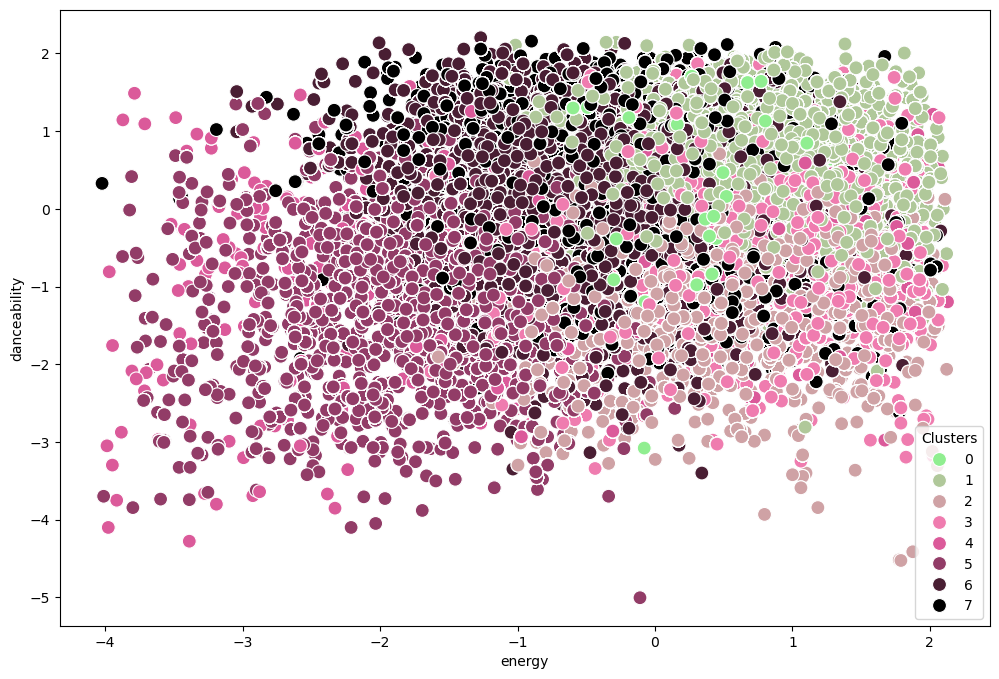

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Create a colormap that transitions from light green to pink to black
cmap = LinearSegmentedColormap.from_list("green_pink_black", ["#90EE90", "#FF69B4", "black"], N=len(set(kmeans.labels_)))

# Convert kmeans labels to a categorical type to ensure all clusters are shown
sub['cluster_labels'] = pd.Categorical(kmeans.labels_, categories=range(num_clusters))

# Plot the clusters
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=sub['energy'], 
    y=sub['danceability'], 
    hue=kmeans.labels_, 
    legend='full',
    palette=cmap,  # Use the custom light green to pink to black colormap
    s=100
)

ax.grid(False)  # Remove the grid from the background
plt.xlabel('energy')  # Label x-axis
plt.ylabel('danceability')  # Label y-axis
plt.legend(title="Clusters", loc="best")  # Ensure the legend is shown with all clusters
plt.show()

/var/folders/18/9t4s6gxn2qb60_74h5w_ymmw0000gn/T/ipykernel_4619/2233606282.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['cluster_labels'] = pd.Categorical(kmeans.labels_, categories=range(num_clusters))


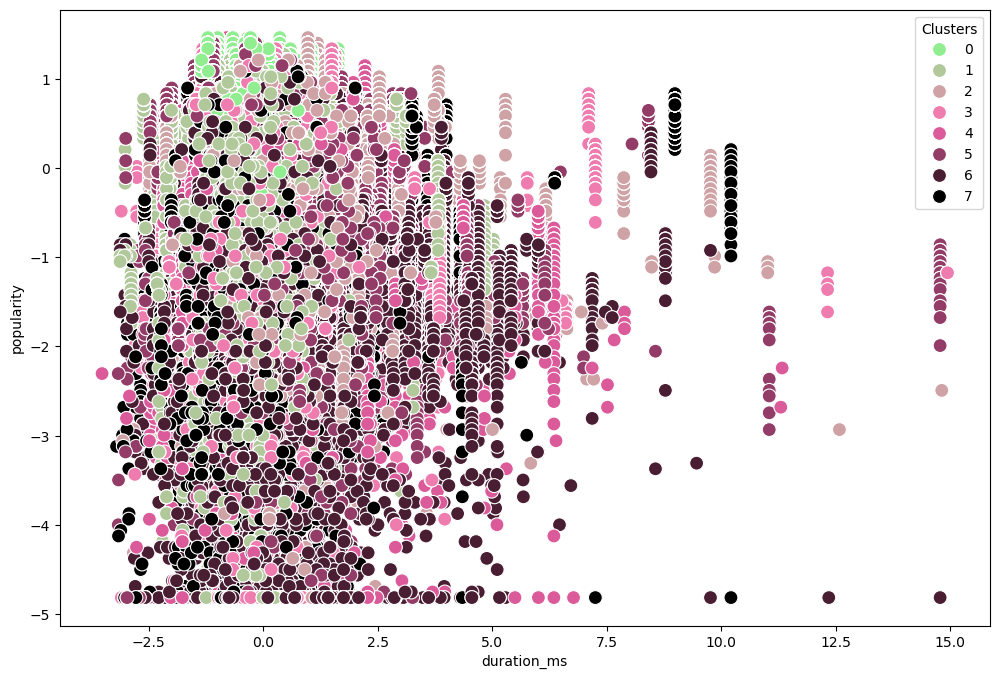

In [82]:
# Create a colormap that transitions from light green to pink to black
cmap = LinearSegmentedColormap.from_list("green_pink_black", ["#90EE90", "#FF69B4", "black"], N=len(set(kmeans.labels_)))

# Convert kmeans labels to a categorical type to ensure all clusters are shown
sub['cluster_labels'] = pd.Categorical(kmeans.labels_, categories=range(num_clusters))

# Plot the clusters
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=sub['duration_ms'], 
    y=sub['popularity'], 
    hue=kmeans.labels_, 
    legend='full',
    palette=cmap,  # Use the custom light green to pink to black colormap
    s=100
)

ax.grid(False)  # Remove the grid from the background
plt.xlabel('duration_ms')  # Label x-axis
plt.ylabel('popularity')  # Label y-axis
plt.legend(title="Clusters", loc="best")  # Ensure the legend is shown with all clusters
plt.show()

/var/folders/18/9t4s6gxn2qb60_74h5w_ymmw0000gn/T/ipykernel_4619/3933603263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['cluster_labels'] = pd.Categorical(kmeans.labels_, categories=range(num_clusters))


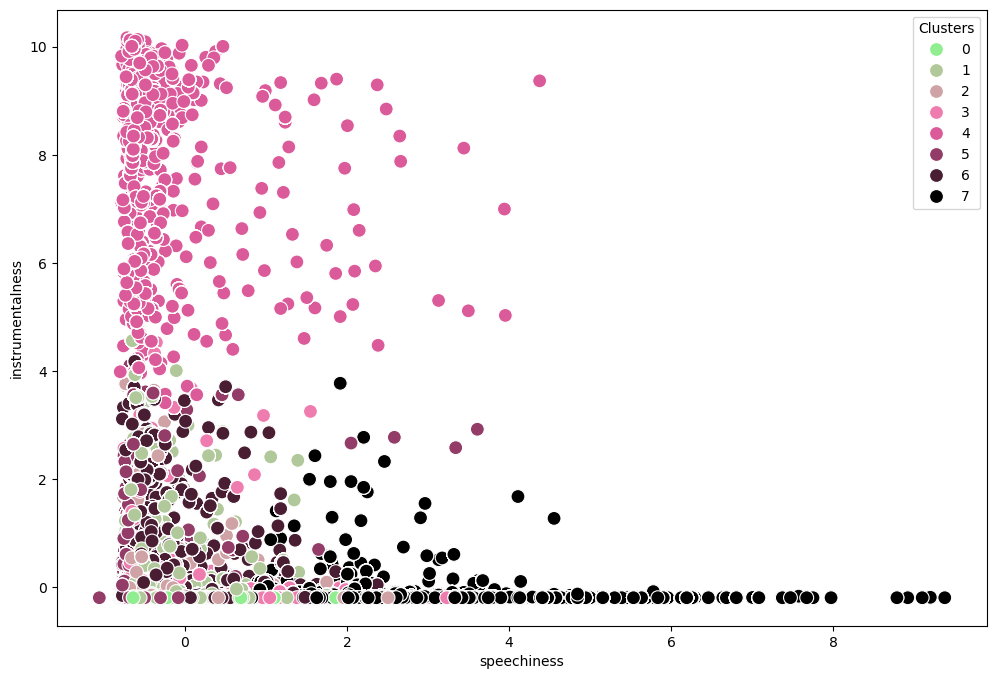

In [84]:
# Create a colormap that transitions from light green to pink to black
cmap = LinearSegmentedColormap.from_list("green_pink_black", ["#90EE90", "#FF69B4", "black"], N=len(set(kmeans.labels_)))

# Convert kmeans labels to a categorical type to ensure all clusters are shown
sub['cluster_labels'] = pd.Categorical(kmeans.labels_, categories=range(num_clusters))

# Plot the clusters
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=sub['speechiness'], 
    y=sub['instrumentalness'], 
    hue=kmeans.labels_, 
    legend='full',
    palette=cmap,  # Use the custom light green to pink to black colormap
    s=100
)

ax.grid(False)  # Remove the grid from the background
plt.xlabel('speechiness')  # Label x-axis
plt.ylabel('instrumentalness')  # Label y-axis
plt.legend(title="Clusters", loc="best")  # Ensure the legend is shown with all clusters
plt.show()

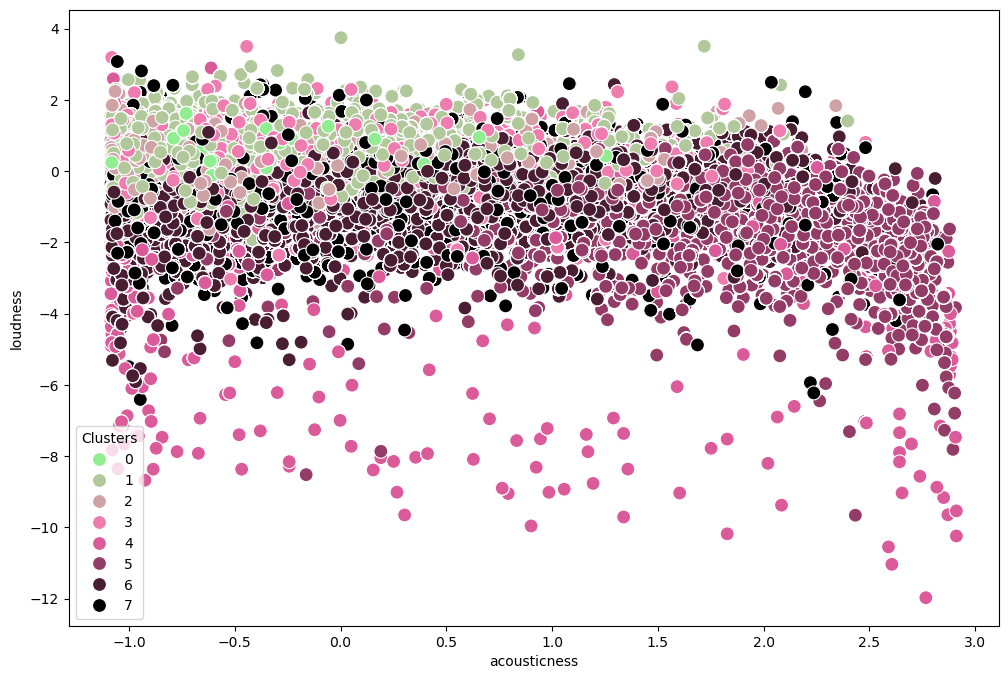

In [86]:
# Create a colormap that transitions from light green to pink to black
cmap = LinearSegmentedColormap.from_list("green_pink_black", ["#90EE90", "#FF69B4", "black"], N=len(set(kmeans.labels_)))

# Plot the clusters
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=sub['acousticness'], 
    y=sub['loudness'], 
    hue=kmeans.labels_, 
    legend='full',
    palette=cmap,  # Use the custom light green to pink to black colormap
    s=100
)

ax.grid(False)  # Remove the grid from the background
plt.xlabel('acousticness')  # Label x-axis
plt.ylabel('loudness')  # Label y-axis
plt.legend(title="Clusters", loc="best")  # Ensure the legend is shown with all clusters
plt.show()

#### 0: high energy, high danceability, high popularity, low instrumentalness, low speechiness, high loudness, low acousticness, high song count
#### 1: high energy, high danceability, low instrumentalness, low speechiness, high loudness
#### 2: high energy, low instrumentalness, low speechiness, high tempo
#### 3: high energy, low instrumentalness, low speechiness, high liveness
#### 4: low energy, high instrumentalness, low loudness
#### 5: low energy, low danceability, low instrumentalness, low speechiness, high acousticness
#### 6: high danceability, low instrumentalness, low speechiness, low acousticness
#### 7: high energy, high danceability, high speechiness, low instrumentalness

## 4. Examining these profiles further by incorporating them into the main data set

In [106]:
# Applying cluster analysis to main dataframe
df.loc[:,"cluster"] = kmeans.labels_

In [94]:
df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,song_count,cluster
0,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"Lady Gaga, Bruno Mars",1,0,0,NaN,2024-09-20,99,False,251667,Die With A Smile,2024-08-16,0.521,0.592,6,-7.777,0,0.0304,0.30800,0.000000,0.122,0.535,157.969,3,1860,2
1,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,2,0,0,NaN,2024-09-20,100,False,210373,HIT ME HARD AND SOFT,2024-05-17,0.747,0.507,2,-10.171,1,0.0358,0.20000,0.060800,0.117,0.438,104.978,4,6116,0
2,5G2f63n7IPVPPjfNIGih7Q,Taste,Sabrina Carpenter,3,0,0,NaN,2024-09-20,96,False,157279,Short n' Sweet,2024-08-23,0.674,0.907,3,-4.086,1,0.0640,0.10100,0.000000,0.297,0.721,112.964,4,1140,1
3,7tI8dRuH2Yc6RuoTjxo4dU,Who,Jimin,4,0,1,NaN,2024-09-20,94,False,170887,MUSE,2024-07-19,0.660,0.756,0,-3.743,0,0.0320,0.00289,0.000000,0.193,0.838,116.034,4,2389,1
4,2qSkIjg1o9h3YT9RAgYN75,Espresso,Sabrina Carpenter,5,0,45,NaN,2024-09-20,97,True,175459,Espresso,2024-04-12,0.701,0.760,0,-5.478,1,0.0285,0.10700,0.000065,0.185,0.690,103.969,4,7504,0


In [114]:
cluster0=  df[df['cluster']==0]

In [116]:
cluster0['artists'].value_counts()

artists
Sabrina Carpenter                      11558
KAROL G                                 9050
Billie Eilish                           8835
Benson Boone                            8475
Tate McRae                              8461
Teddy Swims                             7622
Myke Towers                             7599
FloyyMenor, Cris Mj                     6909
Taylor Swift                            6452
Artemas                                 6019
Hozier                                  5770
The Weeknd, JENNIE, Lily-Rose Depp      5531
Bad Bunny, Feid                         5510
Feid, ATL Jacob                         5367
Jung Kook, Latto                        5293
cassö, RAYE, D-Block Europe             5102
Djo                                     5067
V                                       4940
Manuel Turizo                           4891
Maluma, Carin Leon                      4653
Plan B                                  4493
Ariana Grande                           4075
Ke

In [110]:
cluster1=  df[df['cluster']==1]

In [112]:
cluster1['artists'].value_counts()

artists
Sabrina Carpenter                       3591
Xavi                                    3387
NewJeans                                3224
Calle 24, Chino Pacas, Fuerza Regida    3072
Dasha                                   3004
                                        ... 
The Mind Promotion, Gusty Peralta          1
Calvin Harris, Dua Lipa                    1
Saad Lamjarred, Hatim Ammor                1
Glukoza                                    1
Japssii                                    1
Name: count, Length: 2340, dtype: int64

In [118]:
cluster2=  df[df['cluster']==2]

In [120]:
cluster2['artists'].value_counts()

artists
Travis Scott, Playboi Carti               3699
SZA                                       3481
Taylor Swift                              3374
Feid                                      3330
Ofenbach, Norma Jean Martine              2518
                                          ... 
Happoradio                                   1
Sidhu Moose Wala, Steel Banglez, Fredo       1
iZaak, Luar La L, Omar Courtz                1
Goldband                                     1
DJ Louder, Benggie                           1
Name: count, Length: 1187, dtype: int64

In [122]:
cluster3=  df[df['cluster']==3]

In [124]:
cluster3['artists'].value_counts()

artists
Jimin                                 3366
Jung Kook                             3173
Bad Bunny                             2914
The Weeknd, Playboi Carti, Madonna    2661
Grupo Frontera, Grupo Firme           2648
                                      ... 
Jimilian                                 1
Jefferson Moraes, Edson & Hudson         1
phari(en)                                1
Fabiano Henrique                         1
9mice                                    1
Name: count, Length: 1299, dtype: int64

In [126]:
cluster4=  df[df['cluster']==4]

In [128]:
cluster4['artists'].value_counts()

artists
Billie Eilish                              2186
Cigarettes After Sex                        948
Bad Bunny                                   634
Lost Frequencies, Tom Odell                 611
LXNGVX                                      597
                                           ... 
Givem Tyler Litch, Messi, Jordan Allani       1
Sasha Goodman                                 1
Armani Thobad                                 1
Babalwa M, Stixx                              1
boipepperoni, villemdrillem                   1
Name: count, Length: 322, dtype: int64

In [130]:
cluster5=  df[df['cluster']==5]

In [132]:
cluster5['artists'].value_counts()

artists
Billie Eilish                      4743
Kenya Grace                        4734
Hafdís Huld                        4297
Mitski                             4247
Taylor Swift                       3972
                                   ... 
Suzana și Daciana Vlad                1
Krzysztof Krawczyk                    1
TGD, Kuba Badach                      1
Jan Stosur                            1
Frank Sinatra, Ken Lane Singers       1
Name: count, Length: 1011, dtype: int64

In [134]:
cluster6=  df[df['cluster']==6]

In [136]:
cluster6['artists'].value_counts()

artists
Taylor Swift                         2650
Shubh                                2413
Beyoncé                              2306
Bakr                                 2045
Bizarrap, Young Miko                 1467
                                     ... 
Mirella, Lauri Haav                     1
DT.Bilardo, Perro Primo                 1
Sin Laurent, Oge, SIDARTA               1
Hansraj Raghuwanshi, Suresh Verma       1
Jhayco                                  1
Name: count, Length: 4036, dtype: int64

In [138]:
cluster7=  df[df['cluster']==7]

In [140]:
cluster7['artists'].value_counts()

artists
KAROL G, Peso Pluma                        5654
Jaxomy, Agatino Romero, Raffaella Carrà    2341
Bizarrap, Milo j                           2003
J Balvin, Bad Bunny                        1987
Ozuna, Feid                                1979
                                           ... 
Future, Metro Boomin, J. Cole                 1
Raphael, Hard Rico                            1
A36, Asme                                     1
Norlie & KKV                                  1
T. Danny, Jaber                               1
Name: count, Length: 1928, dtype: int64

## 5. Data profiles and genres by clusters
### 0
#### high energy, high danceability, high popularity, low instrumentalness, low speechiness, high loudness, low acousticness, high song count
#### genres: pop country, pop, reggaeton, latin, alt-pop, pop-rock
#### examples: Sabrina Carpenter, Karol G, Benson Boone, Tate McRae
### 1
#### high energy, high danceability, low instrumentalness, low speechiness, high loudness
#### genres: dance/electronic, latin, k-pop, electropop, synth-pop
#### examples: Xavi, NewJeans, Dasha
### 2
#### high energy, low instrumentalness, low speechiness, high tempo
#### genres: hip-hop, rap, R&B, urbano, dance/electronic
#### examples: Travis Scott, SZA, feid
### 3
#### high energy, low instrumentalness, low speechiness, high liveness
#### genres: k-pop, EDM, latin trap, reggaeton
#### examples: Jimin, Jung Kook, Bad Bunny
### 4
#### low energy, high instrumentalness, low loudness
#### genres: alternative/indie, alt-pop, alt-rock, deep house
#### examples: Billie Eilish, Cigarettes After Sex, Lost Frequencies
### 5 
#### low energy, low danceability, low instrumentalness, low speechiness, high acousticness
#### genres: electropop, folk/pop, indie pop, alternative
#### examples: Billie Eilish, Kenya Grace, Hafdis Huld, Mitski
### 6
#### high danceability, low instrumentalness, low speechiness, low acousticness
#### genres: hip-hop, rap, punjabi, house, EDM, latin trap
#### Examples: Shubh, Beyonce, Bakr
### 7
#### high energy, high danceability, high speechiness, low instrumentalness
#### genres: reggarton, latin urban, electronic, latin trap
#### Examples: Karol G, Jaxomy, Bizarrap, 

## 6. Exporting dataframes

In [ ]:
df_ords.to_csv(os.path.join(path, '02 Data','Prepared Data', 'orders_wrangled.csv'))